In [1]:
import pandas as pd
import numpy as np

In [2]:
loans=pd.read_csv('lending-club-data.csv')

C:\Users\shuoyan001\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [4]:
loans['safe_loan']=0

In [5]:
loans['safe_loan'][loans['bad_loans']==0]=+1
loans['safe_loan'][loans['bad_loans']==1]=-1

C:\Users\shuoyan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\shuoyan001\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
loans=loans.drop(columns=['bad_loans'])

In [7]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loan'   

In [8]:
loans = loans[features + [target]]

In [9]:
loans.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loan
0,B,B2,0,11,RENT,27.65,credit_card,36 months,1,1,83.7,0.00,1
1,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.00,-1
2,C,C5,0,11,RENT,8.72,small_business,36 months,1,1,98.5,0.00,1
3,C,C1,0,11,RENT,20.00,other,36 months,0,1,21.0,16.97,1
4,A,A4,0,4,RENT,11.20,wedding,36 months,1,1,28.3,0.00,1


In [10]:
lo_mat=pd.get_dummies(loans)

In [11]:
lo_mat.head()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loan,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,0,11,27.65,1,1,83.7,0.00,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1.00,1,1,9.4,0.00,-1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,11,8.72,1,1,98.5,0.00,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,11,20.00,0,1,21.0,16.97,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,4,11.20,1,1,28.3,0.00,1,1,0,...,0,0,0,0,0,0,0,1,1,0


In [12]:
train_index=pd.read_json('module-5-assignment-1-train-idx.json')
valid_index=pd.read_json('module-5-assignment-1-validation-idx.json')

In [27]:
train_data=lo_mat.loc[train_index[0]]
valid_data=lo_mat.loc[valid_index[0]]
train_data.shape

(37224, 68)

In [14]:
from sklearn import tree

In [29]:
output_tr=train_data['safe_loan']
tr=train_data.columns
tr=tr.drop('safe_loan')

In [31]:
train_data[tr].head()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,grade_A,grade_B,grade_C,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
1,1,1,1.00,1,1,9.4,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0,5,5.55,1,1,32.6,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,1,1,18.08,1,1,36.5,0.0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
10,1,1,10.08,1,1,91.7,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
12,0,4,7.06,1,1,55.5,0.0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [17]:
decision_tree_model=tree.DecisionTreeClassifier(max_depth=6)
decision_tree_model.fit(train_data[tr],output_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
small_model=tree.DecisionTreeClassifier(max_depth=2)
small_model.fit(train_data[tr],output_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
import graphviz


In [54]:
dot_data=tree.export_graphviz(small_model,out_file=None,feature_names=train_data[tr].columns,rounded=True)

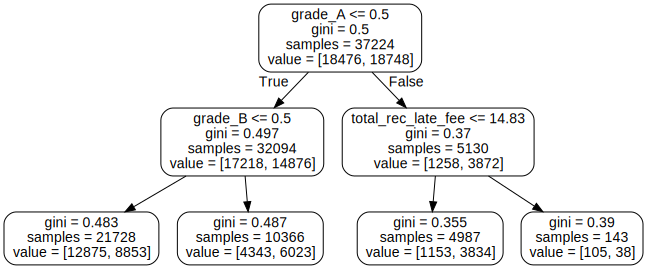

In [55]:
graph=graphviz.Source(dot_data)
graph

In [35]:
valid_safe=valid_data[valid_data[target]==1]
sample_valid_safe=valid_safe[0:2]
valid_risk=valid_data[valid_data[target]!=1]
sample_valid_risk=valid_risk[0:2]

In [36]:
sample_valid=sample_valid_safe.append(sample_valid_risk)

In [37]:
sample_valid

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loan,grade_A,grade_B,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
19,0,11,11.18,1,1,82.4,0.0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
79,0,10,16.85,1,1,96.4,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
24,0,3,13.97,0,1,59.5,0.0,-1,0,0,...,0,0,0,0,1,0,0,0,0,1
41,0,11,16.33,1,1,62.1,0.0,-1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
sample_out=sample_valid['safe_loan']
sample_feat=sample_valid[sample_valid.columns.drop('safe_loan')]
(sample_out==1)

19     True
79     True
24    False
41    False
Name: safe_loan, dtype: bool

In [91]:
False_Positive=(decision_tree_model.predict(sample_feat)==1)&(sample_out==-1)
False_Positive

19    False
79    False
24    False
41     True
Name: safe_loan, dtype: bool

In [44]:
small_model.predict(sample_feat)

array([ 1, -1, -1,  1], dtype=int64)

In [45]:
decision_tree_model.predict_proba(sample_feat)

array([[0.34156543, 0.65843457],
       [0.53630646, 0.46369354],
       [0.64750958, 0.35249042],
       [0.20789474, 0.79210526]])

In [46]:
small_model.predict_proba(sample_feat)

array([[0.41896585, 0.58103415],
       [0.59255339, 0.40744661],
       [0.59255339, 0.40744661],
       [0.23120112, 0.76879888]])

In [58]:
small_model.score(train_data[tr],output_tr)

0.6135020416935311

In [59]:
decision_tree_model.score(train_data[tr],output_tr)

0.6405276165914464

In [60]:
small_model.score(valid_data[valid_data.columns.drop('safe_loan')],valid_data['safe_loan'])

0.6193451098664369

In [61]:
decision_tree_model.score(valid_data[valid_data.columns.drop('safe_loan')],valid_data['safe_loan'])

0.6361482119775959

In [62]:
big_model=tree.DecisionTreeClassifier(max_depth=10)

In [63]:
big_model.fit(train_data[tr],output_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
big_model.score(train_data[tr],output_tr)

0.6637384483129164

In [65]:
big_model.score(valid_data[valid_data.columns.drop('safe_loan')],valid_data['safe_loan'])

0.6264541146057734

In [94]:
def calculate_cost(model,data,real_label):
    decision=model.predict(data)
    false_pos=np.sum((decision==1)&(real_label==-1))
    false_neg=np.sum((decision==-1)&(real_label==1))
    cost=false_neg*10000+20000*false_pos
    return cost
    

In [95]:
calculate_cost(decision_tree_model,valid_data[valid_data.columns.drop('safe_loan')],valid_data['safe_loan'])

50390000